In [24]:
import os

zip_path = "/content/archive (3).zip"

# 1. File details
print("File size:", os.path.getsize(zip_path), "bytes")

# 2. Inspect first 100 bytes (check magic number)
with open(zip_path, "rb") as f:
    header = f.read(100)
print("Header bytes:", header)

# 3. Last 100 bytes (to see if footer is intact)
with open(zip_path, "rb") as f:
    f.seek(-100, os.SEEK_END)
    footer = f.read(100)
print("Footer bytes:", footer)


File size: 122683392 bytes
Header bytes: b'PK\x03\x04-\x00\x00\x00\x08\x00\xe7\x84\xb0P\xfc=\xe9!\xff\xff\xff\xff\xff\xff\xff\xff%\x00\x14\x001st_test/1st_test/2003.10.22.12.06.24\x01\x00\x10\x00,\x87\x11\x00\x00\x00\x00\x00\xc7G\x04\x00\x00\x00\x00\x00l\x9dY\x92\xc3:\xaem\xbf\xcf\x8b\xb8C'
Footer bytes: b'fC\x8c\xe0\xb8\xdd\xf9\xe3\xfb\xa3^\xe1<\xf1h(\xea\xbd\x85\n\xe1\x9f>\xc1O\x83C\x01d\xe9\xfaQyyx\x0e\xc2\x8dB\xa1\x9e\xcc\xdbK\x97N7\xda\xcd\x18-6\x7fu\x8a\xe2\xf4\xac\xce\xe6\x1e\xe8\x9cy\xab\xef<C\x01\xcd\x06\xf8\tl\x83\x02bw\xca\xca\xcdc\xae\xa3\x16\xe9\xde\xa2\x99V\x82`\xa4^\x962\xb3\xa7u\xb4'


In [25]:
import zipfile

zip_path = "/content/archive (3).zip"
try:
    with zipfile.ZipFile(zip_path, 'r') as zf:
        zf.extractall("/content/recovered_files")
    print("✅ Extracted successfully")
except Exception as e:
    print("❌ Extraction failed:", e)


❌ Extraction failed: File is not a zip file


In [26]:
# Install 7zip in Colab
!apt-get install -y p7zip-full

# Try to extract with 7z (more tolerant with broken zips)
!7z x "/content/archive (3).zip" -o"/content/recovered_files" -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,24 CPUs AMD EPYC 7B13 (A00F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 125829120 bytes (120 MiB)

Extracting archive: /content/archive (3).zip
 57% 256 Open             
ERRORS:
Unexpected end of archive

--
Path = /content/archive (3).zip
Type = zip
ERRORS:
Unexpected end of archive
Physical Size = 125848232

 14%      8% 38 - 1st_test/1st_test/2003.10.22.15.14.13                                                17% 76 - 1s

In [27]:
!7z x -y -aos "/content/archive (3).zip" -o"/content/recovered_files"



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,24 CPUs AMD EPYC 7B13 (A00F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 127926272 bytes (122 MiB)

Extracting archive: /content/archive (3).zip
 56% 256 Open             
ERRORS:
Unexpected end of archive

--
Path = /content/archive (3).zip
Type = zip
ERRORS:
Unexpected end of archive
Physical Size = 128144333

 14%    ERROR: Data Error : 1st_test/1st_test/2003.11.01.13.21.44
100% 7 - 1st_test/1st_test/2003.11.01.13.21.44                                              
Sub items Errors: 1

Archives with Errors: 1

Open Errors: 1

Sub items Errors: 1


In [28]:
!7z x -y -aos "/content/archive (3).zip" -o"/content/recovered_files"



7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,24 CPUs AMD EPYC 7B13 (A00F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/                   1 file, 127926272 bytes (122 MiB)

Extracting archive: /content/archive (3).zip
 56% 256 Open             
ERRORS:
Unexpected end of archive

--
Path = /content/archive (3).zip
Type = zip
ERRORS:
Unexpected end of archive
Physical Size = 128144333

 14%    

Archives with Errors: 1

Open Errors: 1



In [29]:
import os

recovered_dir = "/content/recovered_files"

file_count = 0
total_size = 0

for root, _, files in os.walk(recovered_dir):
    for f in files:
        path = os.path.join(root, f)
        size = os.path.getsize(path)
        print(f"{path} --> {size} bytes")
        file_count += 1
        total_size += size

print("\nSummary:")
print("Recovered files:", file_count)
print("Total size recovered:", total_size, "bytes")


/content/recovered_files/1st_test/1st_test/2003.10.22.15.14.13 --> 1148878 bytes
/content/recovered_files/1st_test/1st_test/2003.10.22.14.49.13 --> 1149238 bytes
/content/recovered_files/1st_test/1st_test/2003.10.31.14.51.44 --> 1150587 bytes
/content/recovered_files/1st_test/1st_test/2003.10.23.00.34.13 --> 1147721 bytes
/content/recovered_files/1st_test/1st_test/2003.10.30.01.19.46 --> 1150754 bytes
/content/recovered_files/1st_test/1st_test/2003.11.01.10.41.44 --> 1151676 bytes
/content/recovered_files/1st_test/1st_test/2003.11.01.04.21.44 --> 1150974 bytes
/content/recovered_files/1st_test/1st_test/2003.11.01.03.11.44 --> 1151446 bytes
/content/recovered_files/1st_test/1st_test/2003.10.29.16.49.46 --> 1150840 bytes
/content/recovered_files/1st_test/1st_test/2003.10.23.08.24.13 --> 1147991 bytes
/content/recovered_files/1st_test/1st_test/2003.10.30.02.59.46 --> 1150744 bytes
/content/recovered_files/1st_test/1st_test/2003.10.23.01.04.13 --> 1147160 bytes
/content/recovered_files/1st

In [30]:
import os

small_files = []
for root, _, files in os.walk("/content/recovered_files"):
    for f in files:
        path = os.path.join(root, f)
        size = os.path.getsize(path)
        if size < 10:  # smaller than 10 bytes
            small_files.append(path)

if small_files:
    print("⚠️ Possible corrupted files:")
    for f in small_files:
        print(f)
else:
    print("✅ No obviously corrupted (0-byte) files detected.")


✅ No obviously corrupted (0-byte) files detected.


In [31]:
import pandas as pd

# Replace with a real path to one of your recovered files
sample_file = "/content/recovered_files/1st_test/1st_test/2003.10.22.12.06.24"
df = pd.read_csv(sample_file)
print(df.head())


  -0.022\t-0.039\t-0.183\t-0.054\t-0.105\t-0.134\t-0.129\t-0.142
0  -0.105\t-0.017\t-0.164\t-0.183\t-0.049\t0.029\...            
1  -0.183\t-0.098\t-0.195\t-0.125\t-0.005\t-0.007...            
2  -0.178\t-0.161\t-0.159\t-0.178\t-0.100\t-0.115...            
3  -0.208\t-0.129\t-0.261\t-0.098\t-0.151\t-0.205...            
4  -0.232\t-0.061\t-0.281\t-0.125\t0.046\t-0.088\...            


In [32]:
import pandas as pd

sample_file = "/content/recovered_files/1st_test/1st_test/2003.10.22.12.06.24"

# Read as tab-delimited
df = pd.read_csv(sample_file, sep="\t", header=None)

print("Shape:", df.shape)
print(df.head())


Shape: (20480, 8)
       0      1      2      3      4      5      6      7
0 -0.022 -0.039 -0.183 -0.054 -0.105 -0.134 -0.129 -0.142
1 -0.105 -0.017 -0.164 -0.183 -0.049  0.029 -0.115 -0.122
2 -0.183 -0.098 -0.195 -0.125 -0.005 -0.007 -0.171 -0.071
3 -0.178 -0.161 -0.159 -0.178 -0.100 -0.115 -0.112 -0.078
4 -0.208 -0.129 -0.261 -0.098 -0.151 -0.205 -0.063 -0.066


In [33]:
import os

base = "/content/recovered_files/1st_test/1st_test"
files = [os.path.join(base, f) for f in os.listdir(base)]

for f in files[:5]:  # check first 5 files
    df = pd.read_csv(f, sep="\t", header=None)
    print(f, df.shape)


/content/recovered_files/1st_test/1st_test/2003.10.22.15.14.13 (20480, 8)
/content/recovered_files/1st_test/1st_test/2003.10.22.14.49.13 (20480, 8)
/content/recovered_files/1st_test/1st_test/2003.10.31.14.51.44 (20480, 8)
/content/recovered_files/1st_test/1st_test/2003.10.23.00.34.13 (20480, 8)
/content/recovered_files/1st_test/1st_test/2003.10.30.01.19.46 (20480, 8)


In [34]:
print(df.describe())


                  0             1             2             3             4  \
count  20480.000000  20480.000000  20480.000000  20480.000000  20480.000000   
mean      -0.117385     -0.116101     -0.115861     -0.115780     -0.113290   
std        0.097693      0.092100      0.093755      0.080624      0.111096   
min       -0.684000     -0.588000     -0.708000     -0.552000     -0.635000   
25%       -0.181000     -0.176000     -0.178000     -0.168000     -0.186000   
50%       -0.117000     -0.117000     -0.115000     -0.115000     -0.112000   
75%       -0.054000     -0.059000     -0.051000     -0.063000     -0.042000   
max        0.476000      0.583000      0.278000      0.234000      0.364000   

                  5             6             7  
count  20480.000000  20480.000000  20480.000000  
mean      -0.113300     -0.113439     -0.112928  
std        0.114233      0.073328      0.079152  
min       -0.676000     -0.500000     -0.635000  
25%       -0.188000     -0.159000     

In [35]:
import os
import pandas as pd

base = "/content/recovered_files/1st_test/1st_test"
stats = []
for f in sorted(os.listdir(base)):
    path = os.path.join(base, f)
    try:
        df = pd.read_csv(path, sep="\t", header=None)
        stats.append({
            "file": f,
            "shape": df.shape,
            "min": df.min().min(),
            "max": df.max().max(),
            "mean": df.mean().mean()
        })
    except Exception as e:
        print(f"⚠️ Error reading {f}: {e}")

pd.DataFrame(stats)


⚠️ Error reading 2003.11.01.13.21.44: Error tokenizing data. C error: Expected 8 fields in line 4887, saw 9



,file,shape,min,max,mean
0,2003.10.22.12.06.24,"(20480, 8)",-0.784,0.701,-0.092867
1,2003.10.22.12.09.13,"(20480, 8)",-0.654,0.581,-0.092818
2,2003.10.22.12.14.13,"(20480, 8)",-0.623,0.549,-0.094864
3,2003.10.22.12.19.13,"(20480, 8)",-0.684,0.535,-0.094414
4,2003.10.22.12.24.13,"(20480, 8)",-0.725,0.471,-0.094372
...,...,...,...,...,...
443,2003.11.01.12.31.44,"(20480, 8)",-0.786,0.554,-0.115585
444,2003.11.01.12.41.44,"(20480, 8)",-0.808,0.708,-0.115913
445,2003.11.01.12.51.44,"(20480, 8)",-0.767,0.674,-0.115391
446,2003.11.01.13.01.44,"(20480, 8)",-0.784,0.479,-0.115394


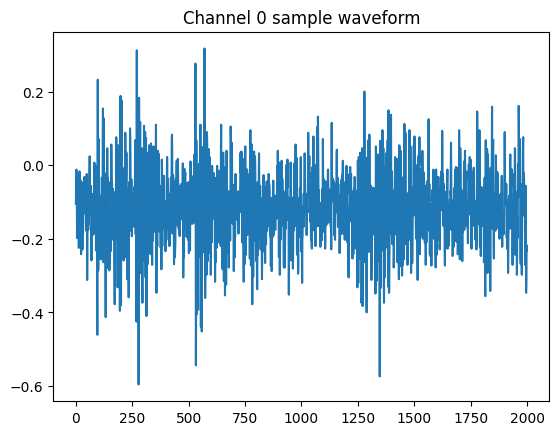

In [36]:
import matplotlib.pyplot as plt

sample = df.iloc[:2000, 0]  # first 2000 points of channel 0
plt.plot(sample)
plt.title("Channel 0 sample waveform")
plt.show()


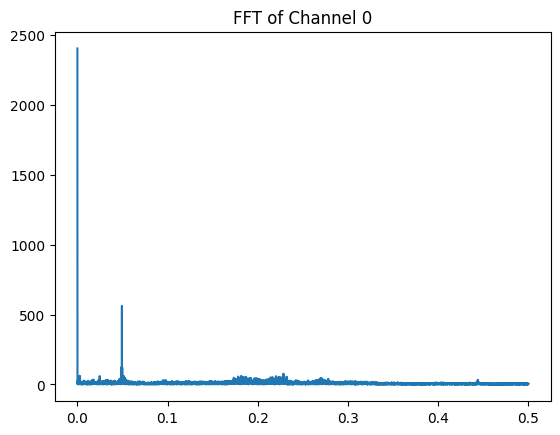

In [37]:
import numpy as np

signal = df[0].values
fft_vals = np.fft.rfft(signal)
freqs = np.fft.rfftfreq(len(signal), d=1)  # adjust d=1 if you know sampling rate
plt.plot(freqs, np.abs(fft_vals))
plt.title("FFT of Channel 0")
plt.show()


In [44]:
# ---------------------------
# 1. Setup & Imports
# ---------------------------
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import stft
import pywt
from tsfresh.feature_extraction import extract_features

# Path to recovered dataset
DATA_DIR = "/content/recovered_files/1st_test/1st_test"
files = sorted(os.listdir(DATA_DIR))
print("Total files:", len(files))


Total files: 449


In [45]:
# ---------------------------
# 2. Load one sample file
# ---------------------------
sample_file = os.path.join(DATA_DIR, files[0])
df = pd.read_csv(sample_file, sep="\t", header=None)

print("Shape:", df.shape)
print(df.head())

# Each file: 20480 rows × 8 channels


Shape: (20480, 8)
       0      1      2      3      4      5      6      7
0 -0.022 -0.039 -0.183 -0.054 -0.105 -0.134 -0.129 -0.142
1 -0.105 -0.017 -0.164 -0.183 -0.049  0.029 -0.115 -0.122
2 -0.183 -0.098 -0.195 -0.125 -0.005 -0.007 -0.171 -0.071
3 -0.178 -0.161 -0.159 -0.178 -0.100 -0.115 -0.112 -0.078
4 -0.208 -0.129 -0.261 -0.098 -0.151 -0.205 -0.063 -0.066


In [46]:
# ---------------------------
# 3. Sampling basics
# ---------------------------
# ⚠️ If sampling rate is known, replace here
fs = 256  # Hz (example: EEG/ECG often 128–256 Hz)

T = df.shape[0] / fs
print(f"Duration of one file: {T:.2f} seconds at {fs} Hz")


Duration of one file: 80.00 seconds at 256 Hz


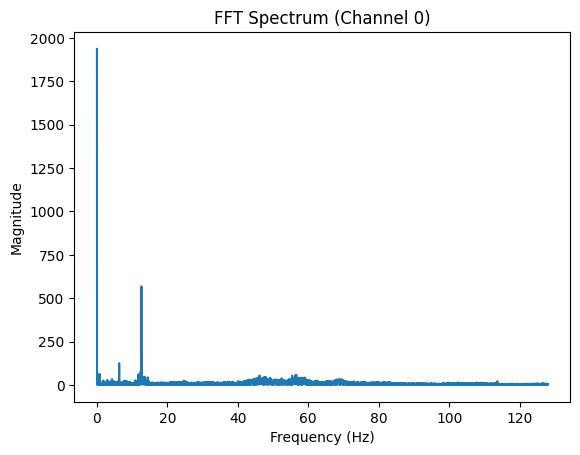

In [47]:
# ---------------------------
# 4. FFT (frequency domain)
# ---------------------------
signal = df[0].values  # take channel 0

fft_vals = np.fft.rfft(signal)
freqs = np.fft.rfftfreq(len(signal), 1/fs)

plt.plot(freqs, np.abs(fft_vals))
plt.title("FFT Spectrum (Channel 0)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()


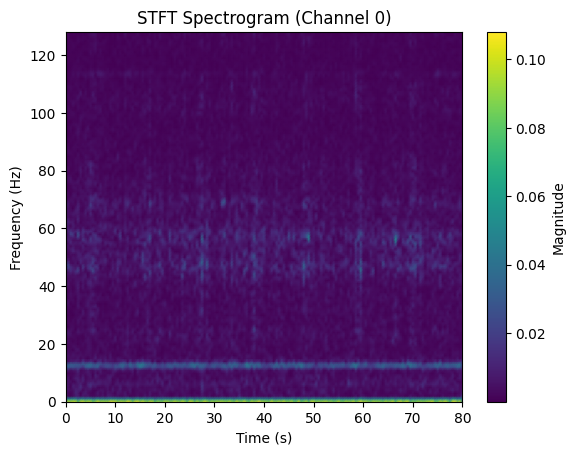

In [48]:
# ---------------------------
# 5. STFT (time-frequency)
# ---------------------------
f, t, Zxx = stft(signal, fs=fs, nperseg=256)

plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title("STFT Spectrogram (Channel 0)")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.colorbar(label="Magnitude")
plt.show()


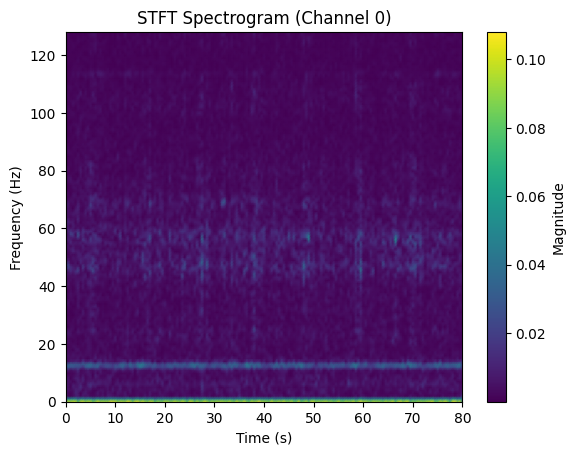

In [49]:
# ---------------------------
# 5. STFT (time-frequency)
# ---------------------------
f, t, Zxx = stft(signal, fs=fs, nperseg=256)

plt.pcolormesh(t, f, np.abs(Zxx), shading='gouraud')
plt.title("STFT Spectrogram (Channel 0)")
plt.ylabel("Frequency (Hz)")
plt.xlabel("Time (s)")
plt.colorbar(label="Magnitude")
plt.show()


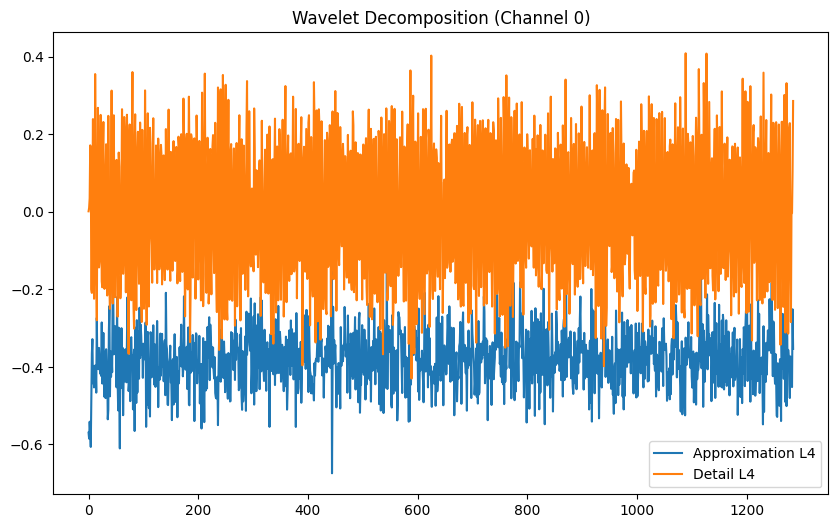

In [50]:
# ---------------------------
# 6. Wavelet Transform
# ---------------------------
coeffs = pywt.wavedec(signal, 'db4', level=4)
cA4, cD4, cD3, cD2, cD1 = coeffs  # Approximation + Details

plt.figure(figsize=(10,6))
plt.plot(cA4, label="Approximation L4")
plt.plot(cD4, label="Detail L4")
plt.legend()
plt.title("Wavelet Decomposition (Channel 0)")
plt.show()


In [51]:
# ---------------------------
# 7. Basic Feature Extraction (manual)
# ---------------------------
def extract_basic_features(x):
    return {
        "mean": np.mean(x),
        "std": np.std(x),
        "kurtosis": pd.Series(x).kurtosis(),
        "skew": pd.Series(x).skew(),
        "energy": np.sum(np.square(x)),
    }

features = []
for fname in files[:10]:  # process first 10 for demo
    path = os.path.join(DATA_DIR, fname)
    data = pd.read_csv(path, sep="\t", header=None)

    file_feats = {"file": fname}
    for col in data.columns:
        chan_feats = extract_basic_features(data[col].values)
        file_feats.update({f"ch{col}_{k}": v for k,v in chan_feats.items()})
    features.append(file_feats)

features_df = pd.DataFrame(features)
print(features_df.head())


                  file  ch0_mean   ch0_std  ch0_kurtosis  ch0_skew  \
0  2003.10.22.12.06.24 -0.094593  0.081122      1.069717 -0.029995   
1  2003.10.22.12.09.13 -0.094903  0.079515      1.162128 -0.070080   
2  2003.10.22.12.14.13 -0.096187  0.080217      0.986819 -0.041649   
3  2003.10.22.12.19.13 -0.095613  0.080825      1.034839  0.005162   
4  2003.10.22.12.24.13 -0.095133  0.082034      1.110728 -0.060200   

   ch0_energy  ch1_mean   ch1_std  ch1_kurtosis  ch1_skew  ...  ch6_mean  \
0  318.025808 -0.093880  0.070648      3.066925  0.220132  ... -0.090969   
1  313.942266 -0.093891  0.069529      2.001798  0.126508  ... -0.091260   
2  321.262662 -0.095863  0.069464      1.969725  0.151061  ... -0.092597   
3  321.011797 -0.095307  0.071265      1.746089  0.099501  ... -0.093485   
4  323.172703 -0.095495  0.072153      1.181742  0.095891  ... -0.092902   

    ch6_std  ch6_kurtosis  ch6_skew  ch6_energy  ch7_mean   ch7_std  \
0  0.060085      0.790736  0.046612  243.414368 -0.

In [52]:
# ---------------------------
# 8. Save Feature Table
# ---------------------------
out_path = "/content/features.csv"
features_df.to_csv(out_path, index=False)
print("✅ Features saved to", out_path)


✅ Features saved to /content/features.csv


In [53]:
# ---------------------------
# 9. Automated Feature Extraction with tsfresh
# ---------------------------
from tsfresh.feature_extraction import extract_features

# Reshape data into long format required by tsfresh
# We take only first 2000 samples to keep runtime reasonable
file_id = 0
data = pd.read_csv(os.path.join(DATA_DIR, files[file_id]), sep="\t", header=None)
data_long = data.reset_index().melt(id_vars=["index"], var_name="channel", value_name="value")
data_long.rename(columns={"index": "time"}, inplace=True)

# tsfresh requires (id, time, value)
data_long["id"] = data_long["channel"]

# Extract features
tsfresh_features = extract_features(
    data_long,
    column_id="id",
    column_sort="time",
    column_value="value",
    n_jobs=0
)

print("tsfresh feature shape:", tsfresh_features.shape)
tsfresh_features.head()


Feature Extraction: 100%|██████████| 8/8 [33:46<00:00, 253.37s/it]

tsfresh feature shape: (8, 783)


,value__variance_larger_than_standard_deviation,value__has_duplicate_max,value__has_duplicate_min,value__has_duplicate,value__sum_values,value__abs_energy,value__mean_abs_change,value__mean_change,value__mean_second_derivative_central,value__median,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
0,0.0,0.0,0.0,1.0,-1937.262,318.025808,0.061234,-9.766102e-07,3.808966e-06,-0.095,...,0.090729,0.342636,1.983305,1.733336,2.970751,4.428034,6.039772,7.656430,NaN,0.545857
1,0.0,0.0,0.0,1.0,-1922.665,282.719049,0.062627,6.689780e-06,1.694231e-22,-0.093,...,0.200814,0.470291,2.510819,1.785313,3.145459,4.702219,6.420158,8.174455,NaN,0.559000
2,0.0,0.0,0.0,1.0,-1921.362,348.540532,0.071334,1.396553e-05,3.955464e-06,-0.093,...,0.136002,0.245901,1.485541,1.766968,3.090308,4.634957,6.320842,7.952630,NaN,0.541857
3,0.0,0.0,0.0,1.0,-1920.031,303.038541,0.065543,-2.441525e-07,9.815412e-06,-0.093,...,0.136002,0.215617,1.810121,1.790447,3.164066,4.746255,6.483163,8.226648,NaN,0.475000
4,0.0,0.0,0.0,1.0,-1859.827,340.211133,0.093744,5.029542e-06,-7.569099e-07,-0.090,...,0.600738,1.157609,3.189739,1.783955,3.137671,4.720970,6.463410,8.251959,NaN,0.464143


In [54]:
# ---------------------------
# 10. Combine manual + tsfresh features
# ---------------------------
combined = pd.concat([features_df, tsfresh_features.reset_index(drop=True)], axis=1)

print("Combined feature table:", combined.shape)
combined.head()


Combined feature table: (10, 824)


,file,ch0_mean,ch0_std,ch0_kurtosis,ch0_skew,ch0_energy,ch1_mean,ch1_std,ch1_kurtosis,ch1_skew,...,value__fourier_entropy__bins_5,value__fourier_entropy__bins_10,value__fourier_entropy__bins_100,value__permutation_entropy__dimension_3__tau_1,value__permutation_entropy__dimension_4__tau_1,value__permutation_entropy__dimension_5__tau_1,value__permutation_entropy__dimension_6__tau_1,value__permutation_entropy__dimension_7__tau_1,value__query_similarity_count__query_None__threshold_0.0,value__mean_n_absolute_max__number_of_maxima_7
0,2003.10.22.12.06.24,-0.094593,0.081122,1.069717,-0.029995,318.025808,-0.093880,0.070648,3.066925,0.220132,...,0.090729,0.342636,1.983305,1.733336,2.970751,4.428034,6.039772,7.656430,NaN,0.545857
1,2003.10.22.12.09.13,-0.094903,0.079515,1.162128,-0.070080,313.942266,-0.093891,0.069529,2.001798,0.126508,...,0.200814,0.470291,2.510819,1.785313,3.145459,4.702219,6.420158,8.174455,NaN,0.559000
2,2003.10.22.12.14.13,-0.096187,0.080217,0.986819,-0.041649,321.262662,-0.095863,0.069464,1.969725,0.151061,...,0.136002,0.245901,1.485541,1.766968,3.090308,4.634957,6.320842,7.952630,NaN,0.541857
3,2003.10.22.12.19.13,-0.095613,0.080825,1.034839,0.005162,321.011797,-0.095307,0.071265,1.746089,0.099501,...,0.136002,0.215617,1.810121,1.790447,3.164066,4.746255,6.483163,8.226648,NaN,0.475000
4,2003.10.22.12.24.13,-0.095133,0.082034,1.110728,-0.060200,323.172703,-0.095495,0.072153,1.181742,0.095891,...,0.600738,1.157609,3.189739,1.783955,3.137671,4.720970,6.463410,8.251959,NaN,0.464143


In [55]:
# ---------------------------
# 11. Save final outputs
# ---------------------------
manual_out = "/content/manual_features.csv"
tsfresh_out = "/content/tsfresh_features.csv"
combined_out = "/content/combined_features.csv"

features_df.to_csv(manual_out, index=False)
tsfresh_features.to_csv(tsfresh_out, index=False)
combined.to_csv(combined_out, index=False)

print("✅ Saved:")
print(manual_out)
print(tsfresh_out)
print(combined_out)


✅ Saved:
/content/manual_features.csv
/content/tsfresh_features.csv
/content/combined_features.csv


In [57]:
import pandas as pd

# Load the combined feature set
df = pd.read_csv("/content/combined_features.csv")

print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns[:20])  # first 20 columns
print("\nSample rows:\n", df.head())


Shape of dataset: (10, 824)

Columns:
 Index(['file', 'ch0_mean', 'ch0_std', 'ch0_kurtosis', 'ch0_skew', 'ch0_energy',
       'ch1_mean', 'ch1_std', 'ch1_kurtosis', 'ch1_skew', 'ch1_energy',
       'ch2_mean', 'ch2_std', 'ch2_kurtosis', 'ch2_skew', 'ch2_energy',
       'ch3_mean', 'ch3_std', 'ch3_kurtosis', 'ch3_skew'],
      dtype='object')

Sample rows:
                   file  ch0_mean   ch0_std  ch0_kurtosis  ch0_skew  \
0  2003.10.22.12.06.24 -0.094593  0.081122      1.069717 -0.029995   
1  2003.10.22.12.09.13 -0.094903  0.079515      1.162128 -0.070080   
2  2003.10.22.12.14.13 -0.096187  0.080217      0.986819 -0.041649   
3  2003.10.22.12.19.13 -0.095613  0.080825      1.034839  0.005162   
4  2003.10.22.12.24.13 -0.095133  0.082034      1.110728 -0.060200   

   ch0_energy  ch1_mean   ch1_std  ch1_kurtosis  ch1_skew  ...  \
0  318.025808 -0.093880  0.070648      3.066925  0.220132  ...   
1  313.942266 -0.093891  0.069529      2.001798  0.126508  ...   
2  321.262662 -0.09586

In [41]:
!pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 68.8 MB/s eta 0:00:00


In [43]:
!pip install tsfresh

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.0/96.0 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 155.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.5/176.5 kB 18.0 MB/s eta 0:00:00
